In [2]:
import drawsvg as dw
%load_ext jhmagics

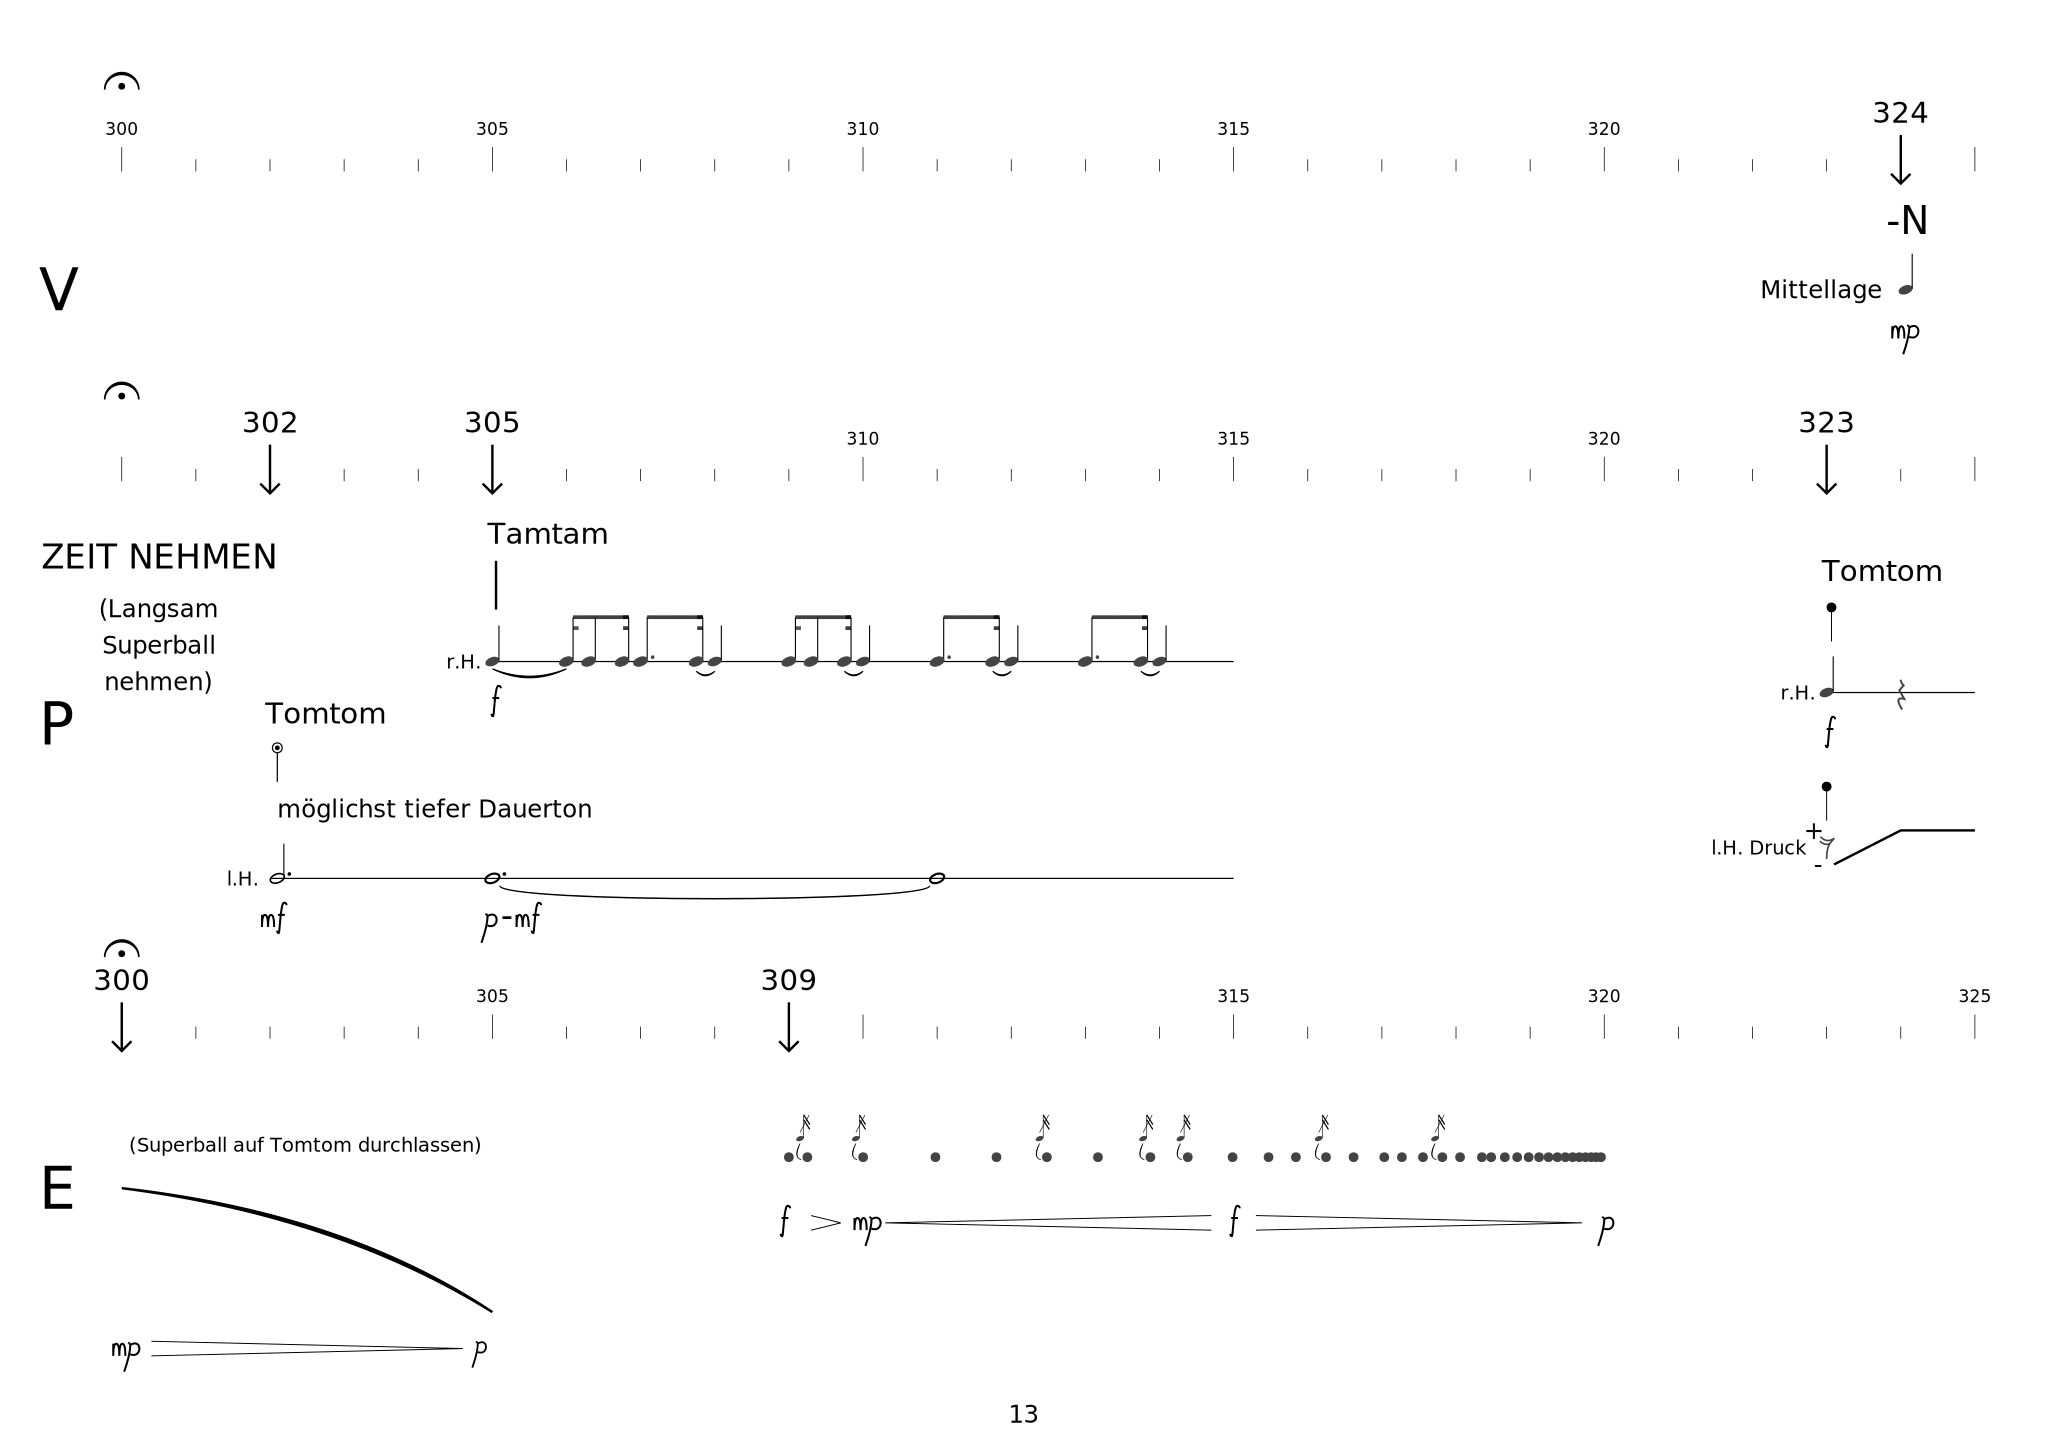

In [8]:
%%jh

w,h = 842,595
d = dw.Drawing(w,h,font_family='Simvoni')

# seitenzahl
seite = 13
d.append(dw.Text('%d'%seite,10,w/2,h-10,text_anchor='middle'))

# page settings
xnum,ynum = 26,22 # posts (= one more than divisions)
mleft,mright,mtop,mbot = 50,30,30,30
xsize,ysize = w-mleft-mright,h-mtop-mbot
xunit,yunit = xsize / (xnum-1),ysize / (ynum-1)

# load own functions
from os import listdir
dir = '/home/jh/src/svg/lib'
files = listdir(dir)
for file in files:
    if file[-3:] == '.py':
        f = '%s/%s' % (dir,file)
        exec(open(f).read())

# custom functions for xgrid and ygrid for this page
def xg(indx):
    return xgrid(indx,tm0)
def yg(indx):
    return ygrid(indx)
    
# raster am rand zur orientierung
#showGridOnMargins()
#showWritingSpace()

# zeitleisten und instrumente links
tm0 = 300  # zeit am anfang dieser seite
off = 15 # offset für die striche
 # normale zahlen in V P E
norm = [[300,305,310,315,320],[310,315,320],[305,315,320,325]]
 # events in V P E
event = [[324],[302,305,323],[300,309]]
 # ygrid positionen für die leisten
yleisten = [1,6,15]
 # instrumente 
insnamen = ['V','P','E']
ytimeplus = [*yleisten,ynum-1]
yposinsnamen = [ytimeplus[i]+(ytimeplus[i+1]-ytimeplus[i])/2 for i in range(3)]
 # write out
for l in range(3):
    y = ygrid(yleisten[l])
    text(insnamen[l],xgrid(0)-34,ygrid(yposinsnamen[l]),24,dominant_baseline='middle')
    for i in range(xnum):
        x = xgrid(i)
        if i%5==0: vline(x,y+off,-10,sw=.3)
        else: vline(x,y+off,-5,sw=.3)
        if (i+tm0) in norm[l]:
            text('%d'%(i+tm0),x,y,7,text_anchor='middle')
        elif (i+tm0) in event[l]:
            text('%d'%(i+tm0),x,y-5,12,text_anchor='middle')
            arrow(x,y,20,4)

# noten und pausen und dynamik größe
notsiz = 4.5
nothals = 1.2
pausiz = 4.5
dynsiz = 10

            
################# VOICE #################

 # -N
x = xg(324)
ygindxvtop = yleisten[0]+.8
ygindxtext = ygindxvtop+.8 #text baseline
text('-N',x-6,yg(ygindxtext),16)
y = yg(ygindxvtop+1.7)
not4tel(x+2,y,nothals,notsiz)
text('Mittellage',x-8,y,10,font_family='Cantarell Light',
     text_anchor='end',dominant_baseline='middle')
yy = y+20
mezzopiano(x,yy,dynsiz)

 # fermaten
x = xg(300)
for i in range(3): fermate(x,yg(yleisten[i])-20,7)

################# PERCUSSION #################

 # linien und instrumente
ypercindx = yleisten[1]
yloffsets = [7,3.5,4] #abstände der linien von der perc zeitleiste
yltom,yltam,yltom2 = [i+ypercindx for i in yloffsets]
ypercinstrs = [yltom,yltam,yltom2]
startends = [302,315,305,315,323,325]
insnamen = ['Tomtom','Tamtam','Tomtom']
yoffsetins = [2.5,1.9,1.8] #abstand der namen von den linien
for i,yl in enumerate(ypercinstrs):
    y = yg(yl)
    x1 = xg(startends[i*2])
    x2 = xg(startends[i*2+1])
    line(x1,y,x2,y,stroke_width=0.5)
    text(insnamen[i],x1-2,yg(yl-yoffsetins[i]),12,font_family='Cantarell')
    if i==0: text('l.H.',x1-5,y,8,text_anchor='end',dominant_baseline='middle',font_family='Cantarell')
    if i>0: text('r.H.',x1-5,y,8,text_anchor='end',dominant_baseline='middle',font_family='Cantarell')
    
 # text
x = xg(300.5)
y = yg(ypercindx)+yunit*2
text('ZEIT NEHMEN',x,y,text_anchor='middle',font_family='Cantarell Light')
for i,t in enumerate(['(Langsam','Superball','nehmen)']):
    text(t,x,y+20+i*15,10,text_anchor='middle',font_family='Cantarell Light')

 # tomtom
y = yg(yltom)
yschrift = yg(yltom-yoffsetins[0])
x = xg(302)
percSuperball(x+3,yschrift+10)
text('möglichst tiefer Dauerton',x+3,y-25,10,font_family='Cantarell Light')
not2tel(x+3,y,nothals,notsiz,dotted=1)
not1tel(xg(305),y,notsiz,dotted=1)
tie2(xg(305.1),y+3,xg(310.9),y+3,.2,.5,thick=.1)
not1tel(xg(311),y,notsiz)
yy = y+20
mezzoforte(x,yy,dynsiz)
piano(xg(305)-2,yy,dynsiz)
text('-',xg(305.18)-2,yy)
mezzoforte(xg(305.5)-2,yy,dynsiz)

 # tamtam
y = yg(yltam)
yschrift = yg(yltam-yoffsetins[1])
x = xg(305)
yy = y+4
percStricknadel(x+1.5,yschrift+7)
not4tel(x,y,nothals,notsiz)
gruppe([xg(306),y,xg(306.3),y,xg(306.75),y],[2,1,2],y_space=notsiz)
gruppe([xg(307),y,xg(307.75),y],[1,2],[1,0],y_space=notsiz)
tie(xg(307.75),yy,xg(308),yy,2,.5)
not4tel(xg(308),y,nothals,notsiz)
gruppe([xg(309),y,xg(309.3),y,xg(309.75),y],[2,1,2],y_space=notsiz)
tie(xg(309.75),yy,xg(310),yy,2,.5)
not4tel(xg(310),y,nothals,notsiz)
gruppe([xg(311),y,xg(311.75),y],[1,2],[1,0],y_space=notsiz)
tie(xg(311.75),yy,xg(312),yy,2,.5)
not4tel(xg(312),y,nothals,notsiz)
gruppe([xg(313),y,xg(313.75),y],[1,2],[1,0],y_space=notsiz)
tie(xg(313.75),yy,xg(314),yy,2,.5)
not4tel(xg(314),y,nothals,notsiz)
yy = y+3
tie(x,yy,xg(306),yy,1,.5)
yy = y+20
forte(x,yy,dynsiz)

 # tom rechte hand
x = xg(323)
y = yg(yltom2)
percHardMallet(x+2,y-35)
not4tel(x,y,nothals,notsiz)
paus4tel(xg(324),y,pausiz,1.2)
forte(x,y+20,dynsiz)

  # linke hand
y = yg(yltom2+2.5)
percHardMallet(x,y-25)
yplus = y-7
yminus = y+7
yy = y-15
text('l.H. Druck',x-8,y,8,text_anchor='end',dominant_baseline='middle',font_family='Cantarell')
text('+',x-2,yplus,10,text_anchor='end',dominant_baseline='middle',font_family='Cantarell')
text('-',x-2,yminus,10,text_anchor='end',dominant_baseline='middle',font_family='Cantarell')
paus16tel(x,y,pausiz)
lines(xg(323.1),yminus,xg(324),yplus,xg(325),yplus)



################# ELEKTRONIK #################

#300
x = xg(300)
y = yg(18)
text('(Superball auf Tomtom durchlassen)',x+3,y-15,8,font_family='Cantarell Light',font_style='italic')
yend = y+yunit*2
glisscurve(x,y,xg(305),yend)
yy = yend+15
mezzopiano(x,yy+3,dynsiz)
dim(xg(300.4),yy,xg(304.6),yy,6)
piano(xg(305)-6,yy+2,dynsiz-1)

#309
x = xg(309)
yplopp = yg(17.5)
 #plopps als zeiten von csound
plopp = [7.113,7.390,8.226,9.310,10.225,10.980,11.746,12.532,13.092,13.764,14.303,
         14.713,15.164,15.578,16.038,16.302,16.618,16.908,17.174,17.501,17.640,17.845,
         18.030,18.202,18.358,18.500,18.633,18.752,18.862,18.962,19.055,19.139,19.216,19.286]
 #als x werte
xplopp = [xg(309+(i-7.113)*54/60) for i in plopp]
for i in xplopp: dot(i,yplopp,2,'#444')
yklack = yg(17.2)
for i in (2,3,6,8,9,13,18):
    not16tel(xplopp[i-1]-3,yklack,nothals,notsiz-2,alsvorschlag=True)
    tie3(xplopp[i-1]-3,yklack+2,xplopp[i-1]-2.5,yplopp+1,xplopp[i-1]-6,yplopp,sw=.3)
yy = yplopp+30
forte(x-3,yy,dynsiz)
dim(xg(309.3),yy-3,xg(309.7),yy-3,6)
mezzopiano(xg(310),yy,dynsiz)
cresc(xg(310.3),yy-3,xg(314.7),yy-3,6)
forte(xg(315)-1,yy,dynsiz)
dim(xg(315.3),yy-3,xg(319.7),yy-3,6)
piano(xg(320),yy,dynsiz)


d.set_pixel_scale(4)
d.save_png('partitur_%02d.png'%seite)
d.save_svg('partitur_%02d.svg'%seite)
d